In [2]:
import pickle
import numpy as np
import pandas as pd

In [251]:
%matplotlib inline
import seaborn as sns

In [55]:
ref_fa = '/data/isshamie/genome/picr.fa'

## Read in tss experimental and all start sites and merge them. Set the actual_start to be tss experimental when there is one

In [111]:
%%time
tss = pd.read_csv('Results/tss_final/tss_peakCenter_1kb_1kb.bed',sep='\t',header=None, index_col =3)
 
#Munge data for downstream processing
cols = tss.columns.values
cols = ['Chr','Start','End','Score','Strand']
tss.columns= cols

name_vals = ['gene','gene_id','transcript_id','Tissues','cs']

tmp_tss = tss.copy()
for ind in tmp_tss.index.values:
    curr = ind.split(';')
    for i,val in enumerate(curr):
        tmp_tss.set_value(ind,name_vals[i],val)

tmp_tss['Length'] = tmp_tss['End'] - tmp_tss['Start']

tss = tmp_tss
tss['actual_start'] = tss.apply(lambda x: int(np.floor(((x['Start']+x['End'])-1)/2)) 
                if x['Strand'] == '+' else int(np.ceil(((x['Start']+x['End'])-1)/2)),axis=1)

#tss['actual_start'] = tss.apply( lambda x: x['Start'] if x['Strand'] == '+' else x['End'],axis=1)

## Just in case make a copy
tss['actual_start_copy'] = tss['actual_start']

tss.head()

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


,Chr,Start,End,Score,Strand,gene,gene_id,transcript_id,Tissues,cs,Length,actual_start
3,,,,,,,,,,,,
RRP7A;gene_2;asmbl_4;CHO;cs=1,picr_0,45849,45999,3.040000,-,RRP7A,gene_2,asmbl_4,CHO,cs=1,150,45923
"RRP7A;gene_2;asmbl_10;Brain,CHO,Spleen;cs=1",picr_0,44409,44566,10.105000,-,RRP7A,gene_2,asmbl_10,"Brain,CHO,Spleen",cs=1,157,44487
"SERHL;gene_1_4;asmbl_14;BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscle,Kidney,Pancreas;cs=2",picr_0,20879,21067,96.550003,+,SERHL,gene_1_4,asmbl_14,"BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscl...",cs=2,188,20972
"POLDIP3;gene_3_1;asmbl_17;BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscle,Kidney,Pancreas;cs=1",picr_0,98719,98916,146.399994,-,POLDIP3,gene_3_1,asmbl_17,"BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscl...",cs=1,197,98817
"POLDIP3;gene_3_1;asmbl_19;BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscle,Kidney;cs=3",picr_0,78177,78416,34.799999,-,POLDIP3,gene_3_1,asmbl_19,"BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscl...",cs=3,239,78296


In [88]:
annotation_start_site = pd.read_csv('/data/isshamie/genome/start_site_mRNA_updated_final_sort.tsv',index_col = 0,sep='\t')
annotation_start_site.head()

,Chr,Start,End,Strand,ID,Parent,gene_id,gene,transcript_id,cs,Length,actual_start
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,176,38694,+,asmbl_2,gene_1_2,gene_1_2,SERHL,asmbl_2,2,38518,176
ID=asmbl_4;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_4;cs=1,picr_0,7715,46630,-,asmbl_4,gene_2,gene_2,RRP7A,asmbl_4,1,38915,46630
ID=asmbl_7;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_7;cs=1,picr_0,7759,44597,-,asmbl_7,gene_2,gene_2,RRP7A,asmbl_7,1,36838,44597
ID=asmbl_8;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_8;cs=1,picr_0,7767,44597,-,asmbl_8,gene_2,gene_2,RRP7A,asmbl_8,1,36830,44597
ID=asmbl_9;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_9;cs=1,picr_0,7789,44568,-,asmbl_9,gene_2,gene_2,RRP7A,asmbl_9,1,36779,44568


In [132]:
annotation_start_site.shape

(52382, 12)

### Merge the two 

In [113]:
tss['actual_start_copy'] = tss['actual_start']

In [229]:
merged = pd.merge(tss,annotation_start_site,on=['transcript_id','gene','gene_id','Strand','Chr'],how='outer')#,left_on='actual_start')

## Set actual_start to be from left if its not null otherwise right
merged['actual_start'] = merged.apply(lambda x: x['actual_start_x'] if not np.isnan(x['actual_start_x']) 
                                      else x['actual_start_y'], axis=1)
print(merged.shape)

merged['Start'] = merged['Start_y']
merged['End'] = merged['End_y']

merged = merged.set_index('transcript_id')

# Sort by chr, start and end
merged = merged.sort_values(['Chr','Start','End'])
merged.head()

(52382, 21)


,Chr,Start_x,End_x,Score,Strand,gene,gene_id,Tissues,cs_x,Length_x,...,Start_y,End_y,ID,Parent,cs_y,Length_y,actual_start_y,actual_start,Start,End
transcript_id,,,,,,,,,,,,,,,,,,,,,
asmbl_4,picr_0,45849.0,45999.0,3.040000,-,RRP7A,gene_2,CHO,cs=1,150.0,...,7715,46630,asmbl_4,gene_2,1,38915,46630,45923.0,7715,46630
asmbl_10,picr_0,44409.0,44566.0,10.105000,-,RRP7A,gene_2,"Brain,CHO,Spleen",cs=1,157.0,...,7821,44513,asmbl_10,gene_2,1,36692,44513,44487.0,7821,44513
asmbl_14,picr_0,20879.0,21067.0,96.550003,+,SERHL,gene_1_4,"BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscl...",cs=2,188.0,...,20942,38694,asmbl_14,gene_1_4,2,17752,20942,20972.0,20942,38694
asmbl_17,picr_0,98719.0,98916.0,146.399994,-,POLDIP3,gene_3_1,"BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscl...",cs=1,197.0,...,49679,98922,asmbl_17,gene_3_1,1,49243,98922,98817.0,49679,98922
asmbl_19,picr_0,78177.0,78416.0,34.799999,-,POLDIP3,gene_3_1,"BMDMwt,Heart,Spleen,CHO,Brain,Lung,Liver,Muscl...",cs=3,239.0,...,64336,78255,asmbl_19,gene_3_1,3,13919,78255,78296.0,64336,78255


### Load CDS and setup for later merging

In [168]:
%%time 
cds = pd.read_csv('/data/isshamie/genome/CDS.gff3',sep='\t',header=None,index_col=8)
#Munge data for downstream processing
cols = cds.columns.values
cols = ['Chr','Merge','Type','Start','End','.','Strand','..']
cds.columns= cols
#Drop the unncesseary columns
cds.drop(['Merge','.','..','Type'],axis=1,inplace=True)

## Setup actual_start for cds
cds['actual_start'] = cds.apply(lambda x: int(x['Start']) if x['Strand'] == '+' else int(x['End']),axis=1)


tmp_cds = cds.copy()
for ind in tmp_cds.index.values:
    curr = ind.split(';')
    for i in curr:
        curr_split = i.split('=')
        tmp_cds.set_value(ind,curr_split[0],curr_split[1])

tmp_cds['Length'] = tmp_cds['End'] - tmp_cds['Start']

cds = tmp_cds
cds = cds.rename(columns={'protein_id':'transcript_id'})
cds.head()

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


CPU times: user 1min 30s, sys: 4.42 s, total: 1min 35s
Wall time: 58.4 s


## Save as bed file and extract sequences

# Extract sequences

In [242]:
%%time
bins = [-2000,2000]

alltss_f = 'Results/tss_final/tss_peakCenter_1kb_1kb_ALLGENES_FLANK_2kb.bed'

merged_bed = merged[['Chr','actual_start','Strand','gene_id','gene']]
merged_bed['transcript_id'] = merged_bed.index
merged_bed['Start']  = merged_bed['actual_start'] + bins[0]
merged_bed['Start'] = merged_bed['Start'].astype(int)
merged_bed['End'] = merged_bed['actual_start'] +  bins[1] + 1
merged_bed['End'] = merged_bed['End'].astype(int)
merged_bed['ID'] = merged_bed.apply(lambda x: x['gene'] + ';' + x['gene_id'] + ';' + x['transcript_id'],axis=1)
merged_bed['Score'] = 0
merged_bed = merged_bed[['Chr','Start','End','ID','Score','Strand']]

merged_bed.to_csv(alltss_f,header=None,index=None,sep='\t')

merged_bed

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Chr,Start,End,ID,Score,Strand
transcript_id,,,,,,
asmbl_2,picr_0,-1824,2177,SERHL;gene_1_2;asmbl_2,0,+
asmbl_4,picr_0,43923,47924,RRP7A;gene_2;asmbl_4,0,-
asmbl_7,picr_0,42597,46598,RRP7A;gene_2;asmbl_7,0,-
asmbl_8,picr_0,42597,46598,RRP7A;gene_2;asmbl_8,0,-
asmbl_9,picr_0,42568,46569,RRP7A;gene_2;asmbl_9,0,-
asmbl_10,picr_0,42487,46488,RRP7A;gene_2;asmbl_10,0,-
asmbl_11,picr_0,16149,20150,SERHL;gene_1_4;asmbl_11,0,+
asmbl_12,picr_0,18787,22788,SERHL;gene_1_4;asmbl_12,0,+
asmbl_14,picr_0,18972,22973,SERHL;gene_1_4;asmbl_14,0,+


In [216]:
out_fa = alltss_f.replace('bed','fa')
cmd = 'homerTools extract {bed_f} {ref_fa} -fa > {out}'.format(bed_f=alltss_f,ref_fa=ref_fa,out=out_fa)
print(cmd)
!{cmd}


homerTools extract Results/tss_final/tss_peakCenter_1kb_1kb_ALLGENES_FLANK_2kb.bed /data/isshamie/genome/picr.fa -fa > Results/tss_final/tss_peakCenter_1kb_1kb_ALLGENES_FLANK_2kb.fa

	Extracting sequences from file: /data/isshamie/genome/picr.fa
	Looking for peak sequences in a single file (/data/isshamie/genome/picr.fa)
	Extracting 2093 sequences from picr_0
	Extracting 1147 sequences from picr_1
	Extracting 1913 sequences from picr_2
	Extracting 1117 sequences from picr_3
	Extracting 1063 sequences from picr_4
	Extracting 747 sequences from picr_5
	Extracting 719 sequences from picr_6
	Extracting 1684 sequences from picr_8
	Extracting 654 sequences from picr_9
	Extracting 767 sequences from picr_10
	Extracting 516 sequences from picr_11
	Extracting 190 sequences from picr_7b
	Extracting 599 sequences from picr_12
	Extracting 584 sequences from picr_13
	Extracting 506 sequences from picr_14
	Extracting 609 sequences from picr_15
	Extracting 676 sequences from picr_16
	Extracting 285 s

	Extracting 1 sequences from picr_284
	Extracting 1 sequences from picr_285
	Extracting 4 sequences from picr_289
	Extracting 3 sequences from picr_294
	Extracting 1 sequences from picr_295
	Extracting 6 sequences from picr_296
	Extracting 5 sequences from picr_298
	Extracting 5 sequences from picr_303
	Extracting 1 sequences from picr_308
	Extracting 5 sequences from picr_309
	Extracting 1 sequences from picr_310
	Extracting 2 sequences from picr_311
	Extracting 15 sequences from picr_312
	Extracting 1 sequences from picr_314
	Extracting 7 sequences from picr_316
	Extracting 13 sequences from picr_317
	Extracting 3 sequences from picr_318
	Extracting 1 sequences from picr_319
	Extracting 4 sequences from picr_321
	Extracting 6 sequences from picr_323
	Extracting 3 sequences from picr_325
	Extracting 11 sequences from picr_328
	Extracting 3 sequences from picr_329
	Extracting 3 sequences from picr_330
	Extracting 7 sequences from picr_331
	Extracting 6 sequences from picr_332
	Extracti

	Extracting 1 sequences from picr_1122
	Extracting 1 sequences from picr_1125
	Extracting 1 sequences from picr_1127
	Extracting 2 sequences from picr_1135
	Extracting 3 sequences from picr_1137
	Extracting 1 sequences from picr_1140
	Extracting 1 sequences from picr_1142
	Extracting 1 sequences from picr_1149
	Extracting 1 sequences from picr_1154
	Extracting 4 sequences from picr_1165
	Extracting 5 sequences from picr_1173
	Extracting 1 sequences from picr_1174
	Extracting 1 sequences from picr_1181
	Extracting 1 sequences from picr_1194
	Extracting 1 sequences from picr_1200
	Extracting 1 sequences from picr_1202
	Extracting 3 sequences from picr_1209
	Extracting 1 sequences from picr_1216
	Extracting 1 sequences from picr_1223
	Extracting 4 sequences from picr_1232
	Extracting 1 sequences from picr_1233
	Extracting 1 sequences from picr_1241
	Extracting 1 sequences from picr_1251
	Extracting 2 sequences from picr_1258
	Extracting 1 sequences from picr_1262
	Extracting 1 sequences f

### get the center, do +/- 2kb for all, save to proper bed file

## Loop through each peak and
NOTE: Note which strand you are working with  
1) Add sequence -2k:+2k  
2) Determine if there is a nearby transcript id within 2k bp upstream and if it is part of the same gene_id or different. If it is the same, write where the end of it is.   
3) Determine where the coding region of this associated gene is.   
4) Determine if any genes downstream within 2kb (Does not matter which strand its in)  

Next, loop through each non-experimental transcript, pick the first isoform and extract their sequence and do the same as before . 

INPUT: 
1) Annotation file: List of each mRNA, exon, and coding region  
2) txn peak file  
3) picr.fa genome for extracting sequences  
4) txn_df to get transcripts that do not have a peak (May not be as necessary)  

## Create output dataframe tss_full

In [269]:
tss_full = merged[['gene_id','gene']] #merged[['transcript_id','gene_id','gene']]
#tss_full = tss_full.set_index('transcript_id')

## Add columns
tss_full['Gene Upstream Position'] = np.nan
tss_full['Coding Region Start'] = np.nan
tss_full['Gene Downstream Position'] = np.nan
tss_full['Experimental'] = 0
tss_full['ATAC'] = np.nan

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [270]:
tss_full.head()

,gene_id,gene,Gene Upstream Position,Coding Region Start,Gene Downstream Position,Experimental,ATAC
transcript_id,,,,,,,
asmbl_2,gene_1_2,SERHL,NaN,NaN,NaN,0,NaN
asmbl_4,gene_2,RRP7A,NaN,NaN,NaN,0,NaN
asmbl_7,gene_2,RRP7A,NaN,NaN,NaN,0,NaN
asmbl_8,gene_2,RRP7A,NaN,NaN,NaN,0,NaN
asmbl_9,gene_2,RRP7A,NaN,NaN,NaN,0,NaN


In [243]:
import tqdm

In [ ]:
%%time
## Loop through each transcript
bin_val = 2000
for ind,val in tqdm.tqdm_notebook(merged.iterrows()):
    # First determine if experimental:
    if ~(np.isnan(merged.loc[ind,'actual_start_x'])):
        tss_full.set_value(ind,'Experimental',1)
    
    ## For each, get all transcripts of the same Chromosome
    filt = foo[foo['Chr'] == val['Chr']]

    ## Keep transcripts that are within bin_val away from the current transcript
    filt = filt[np.abs(val['actual_start'] - filt['actual_start']) < bin_val]
    
    ## Keep transcripts from a different gene_id, so no isoforms
    filt = filt[~(filt['gene_id'] == val['gene_id'])]
    
    
    if not len(filt) == 0:
#         print(val['gene'])
#         print(val['gene_id'])
#         print(filt)
        
        ## Determine nearest upstream genes distance and nearest downstream genes distance
        
        ## Multiplier is to reverse the up- and downstream genes when the transcript is on the negative strand
        if val['Strand'] == '+':
            multiplier = 1
        elif val['Strand'] == '-':
            multiplier = -1
        else:
            print('Strand info is wrong',ind)
            continue
        # For upstream, the upstream genes will have smaller start, so the value will be negative relative to the center
        up = filt[multiplier*(filt['actual_start'] - val['actual_start']) < 0]
        upstream = np.max(multiplier*(up['actual_start'] - val['actual_start']))
        # For downstream, the distance will be positive
        down = filt[multiplier*(filt['actual_start'] - val['actual_start']) > 0]
        downstream = np.min(multiplier*(down['actual_start'] - val['actual_start']))
        
        #Set values in the matrix
        tss_full.set_value(ind,'Gene Upstream Position',upstream) 
        tss_full.set_value(ind,'Gene Downstream Position',downstream)

    
    ## Get nearest CDS 
    cds_filt = cds[cds['transcript_id'] == ind]
    
    ##Assuming that cds will always be downstream of start site (by definition)
    if not len(cds_filt) == 0:
        tss_full.set_value(ind,'Coding Region Start',np.min(np.abs(val['actual_start'] - cds_filt['actual_start'])))
                           

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


### Save output

In [279]:
tss_full.to_csv('Results/tss_final/tss_peakCenter_1kb_1kb_ALLGENES_FLANK_2kb.META.tsv',sep='\t')

## Plot

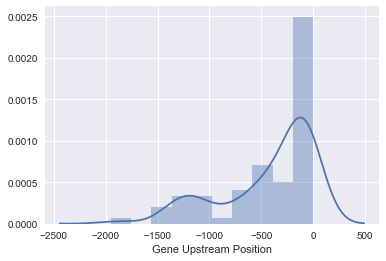

In [274]:
sns.distplot(tss_full['Gene Upstream Position'].dropna())

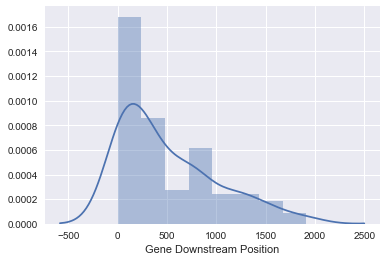

In [275]:
sns.distplot(tss_full['Gene Downstream Position'].dropna())

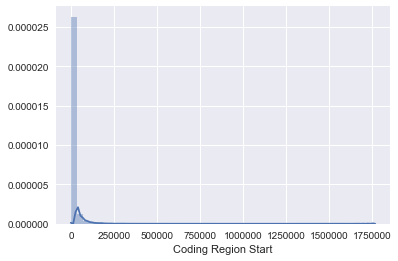

In [276]:
sns.distplot(tss_full['Coding Region Start'].dropna())

In [277]:
tss_full['Coding Region Start'].dropna().shape

(48476,)

-------------------

-------------------

-------------------

-------------------

# Ignore below this.
Misc. Scrap

### First make flanking -2kb to +2kb for each peak and save

In [56]:
tss_experiment = 'Results/tss_final/tss_peakCenter_1kb_1kb.bed'
tss_flank_out = 'Results/tss_final/tss_peakCenter_1kb_1kb_FLANK_2kb.bed'

out_fa = 'Results/tss_final/tss_peakCenter_1kb_1kb_FLANK_2kb.fa'

In [60]:
def extend_bed_file(bed_f, out_f, bins=[-2000,2000]):
    df = pd.read_csv(bed_f,sep='\t',header=None)
    center = df.apply(lambda x: int(np.floor(((x[1]+x[2])-1)/2)) 
                    if x[5] == '+' else int(np.ceil(((x[1]+x[2])-1)/2)),axis=1)
    df[1] = center + bins[0]
    df[2] = center + bins[1] + 1
    df.to_csv(out_f,sep='\t',header= None,index=False)
    return 

In [61]:
%%time
extend_bed_file(tss_experiment,tss_flank_out,bins=[-2000,2000])

CPU times: user 3.14 s, sys: 40 ms, total: 3.18 s
Wall time: 3.19 s


In [64]:
cmd = 'homerTools extract {bed_f} {ref_fa} -fa > {out}'.format(bed_f=tss_flank_out,ref_fa=ref_fa,out=out_fa)
!{cmd}


	Extracting sequences from file: /data/isshamie/genome/picr.fa
	Looking for peak sequences in a single file (/data/isshamie/genome/picr.fa)
	Extracting 916 sequences from picr_0
	Extracting 540 sequences from picr_1
	Extracting 744 sequences from picr_2
	Extracting 532 sequences from picr_3
	Extracting 478 sequences from picr_4
	Extracting 362 sequences from picr_5
	Extracting 346 sequences from picr_6
	Extracting 764 sequences from picr_8
	Extracting 306 sequences from picr_9
	Extracting 359 sequences from picr_10
	Extracting 249 sequences from picr_11
	Extracting 82 sequences from picr_7b
	Extracting 275 sequences from picr_12
	Extracting 285 sequences from picr_13
	Extracting 212 sequences from picr_14
	Extracting 285 sequences from picr_15
	Extracting 295 sequences from picr_16
	Extracting 145 sequences from picr_17
	Extracting 174 sequences from picr_18
	Extracting 229 sequences from picr_19
	Extracting 258 sequences from picr_20
	Extracting 174 sequences from picr_21
	Extracting

	Extracting 1 sequences from picr_432
	Extracting 1 sequences from picr_433
	Extracting 1 sequences from picr_434
	Extracting 2 sequences from picr_435
	Extracting 1 sequences from picr_456
	Extracting 2 sequences from picr_477
	Extracting 1 sequences from picr_478
	Extracting 1 sequences from picr_493
	Extracting 3 sequences from picr_512
	Extracting 1 sequences from picr_517
	Extracting 1 sequences from picr_534
	Extracting 1 sequences from picr_566
	Extracting 7 sequences from picr_591
	Extracting 1 sequences from picr_603
	Extracting 1 sequences from picr_606
	Extracting 1 sequences from picr_653
	Extracting 1 sequences from picr_654
	Extracting 3 sequences from picr_709
	Extracting 1 sequences from picr_721
	Extracting 1 sequences from picr_738
	Extracting 2 sequences from picr_776
	Extracting 1 sequences from picr_778
	Extracting 1 sequences from picr_817
	Extracting 1 sequences from picr_824
	Extracting 1 sequences from picr_843
	Extracting 1 sequences from picr_853
	Extracting 